In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
print('LOADING RAW DATASET.....')

df = pd.read_excel('./prior_value_minmax_scada2.xlsx', engine='openpyxl')
labels = df['binary result']
drop_col = ['binary result', 'categorized result', 'specific result']
df.drop(columns=drop_col, inplace=True)

idx_split = -68658
X_train = df[:idx_split]
y_train = labels[:idx_split]
X_test = df[idx_split:]
y_test = labels[idx_split:]

print('DONE.')

LOADING RAW DATASET.....
DONE.


In [4]:
from sklearn.feature_selection import VarianceThreshold
new_trainset = VarianceThreshold().fit_transform(X_train)

In [5]:
new_trainset.shape

(205970, 16)

In [6]:
X_train.shape

(205970, 16)

<AxesSubplot:>

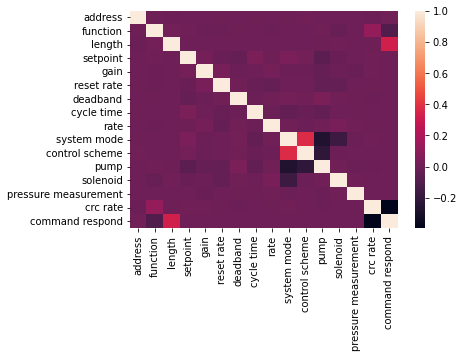

In [10]:
corr = X_train.corr()
sns.heatmap(corr)

In [12]:
# Method 1
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.85:
            if columns[j]:
                columns[j] = False
selected_columns = X_train.columns[columns]
selected_columns

Index(['address', 'function', 'length', 'setpoint', 'gain', 'reset rate',
       'deadband', 'cycle time', 'rate', 'system mode', 'control scheme',
       'pump', 'solenoid', 'pressure measurement', 'crc rate',
       'command respond'],
      dtype='object')

In [13]:
len(selected_columns)

16

In [14]:
len(selected_columns.unique())

16

In [12]:
features = set(trainset.columns)

In [14]:
print(len(features - corr_features))
print(features - corr_features)

14
{'P4_HT_FD', 'P1_PCV02D', 'P1_TIT01', 'P1_B2016', 'P2_24Vdc', 'P1_B2004', 'P1_B4002', 'P1_B3005', 'P3_LCP01D', 'P2_VT01e', 'P4_ST_FD', 'P1_B3004', 'P1_PIT02', 'P1_B4005'}


In [15]:
trainset.drop(columns=corr_features,inplace=True)
testset.drop(columns=corr_features,inplace=True)

In [21]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 104.906593
Feature 1: 14577.049284
Feature 2: 1134.093763
Feature 3: 1288.663892
Feature 4: 5026.197866
Feature 5: 892.229308
Feature 6: 43.282274
Feature 7: 45.586266
Feature 8: 4042.163860
Feature 9: 592.119858
Feature 10: 0.715473
Feature 11: 765.943705
Feature 12: 219.669412
Feature 13: 221.534042
Feature 14: 5646.093500
Feature 15: 6582.463202


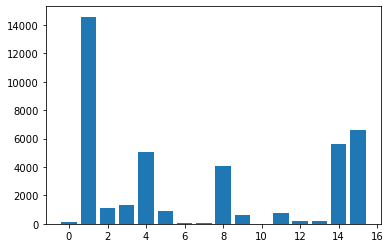

In [23]:
from matplotlib import pyplot as plt
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [24]:
X_train.columns

Index(['address', 'function', 'length', 'setpoint', 'gain', 'reset rate',
       'deadband', 'cycle time', 'rate', 'system mode', 'control scheme',
       'pump', 'solenoid', 'pressure measurement', 'crc rate',
       'command respond'],
      dtype='object')

In [25]:
drop_col_idx = [0, 6, 7, 10]
for idx in drop_col_idx:
    print(X_train.columns[idx])

address
deadband
cycle time
control scheme
